In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(42)

**Q1.D**

corr(X,Z) ≈ 0.518
True b = 2.000
Full model  b̂_X = 1.957
Omit-Z model b̂_X = 1.459


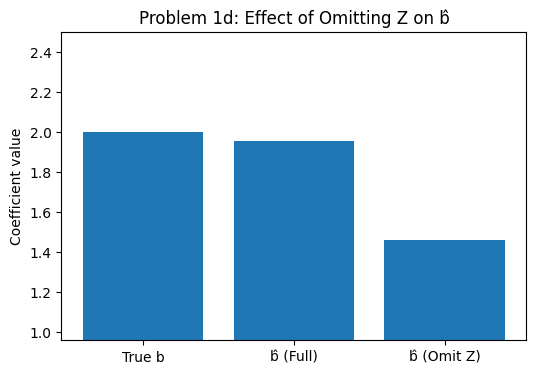

In [2]:
# Parameters for the true DGP
n = 400
a_true, b_true, c_true, sigma_e = 1.0, 2.0, -1.0, 1.0  # Y = a + b*X + c*Z + e

#Correlated regressors X and Z
X = np.random.normal(size=n)
Z = 0.6*X + np.random.normal(scale=0.8, size=n)  # corr ~ 0.6 but random
e = np.random.normal(scale=sigma_e, size=n)

# Generate Y
Y = a_true + b_true*X + c_true*Z + e

#Fit full model Y ~ X + Z
X_full = sm.add_constant(pd.DataFrame({"X": X, "Z": Z}))
m_full = sm.OLS(Y, X_full).fit()

# Fit omitted model Y ~ X
X_omit = sm.add_constant(pd.DataFrame({"X": X}))
m_omit = sm.OLS(Y, X_omit).fit()

corr_xz = np.corrcoef(X, Z)[0, 1]
print(f"corr(X,Z) ≈ {corr_xz:.3f}")
print(f"True b = {b_true:.3f}")
print(f"Full model  b̂_X = {m_full.params['X']:.3f}")
print(f"Omit-Z model b̂_X = {m_omit.params['X']:.3f}")

# Here we  Bar chart: True b vs. estimates
plt.figure(figsize=(6,4))
labels = ["True b", "b̂ (Full)", "b̂ (Omit Z)"]
vals = [b_true, m_full.params["X"], m_omit.params["X"]]
plt.bar(labels, vals)
plt.ylabel("Coefficient value")
plt.title("Problem 1d: Effect of Omitting Z on b̂")
plt.ylim(min(vals+[b_true]) - 0.5, max(vals+[b_true]) + 0.5)
plt.show()


n values: [  50  100  200  400  800 1600 3200]
b̂_X (omit Z): [np.float64(1.516), np.float64(1.467), np.float64(1.342), np.float64(1.298), np.float64(1.447), np.float64(1.404), np.float64(1.392)]
Theoretical asymptotic b̂_X (omit Z) ≈ 1.400


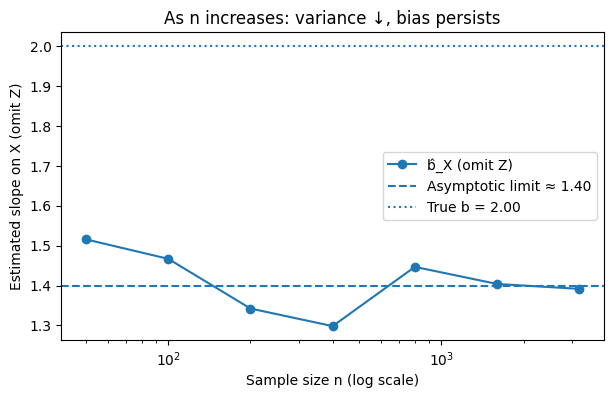

In [3]:
def run_once(n, rho=0.6, a=1.0, b=2.0, c=-1.0, sigma=1.0):
    X = np.random.normal(size=n)
    Z = rho*X + np.random.normal(scale=np.sqrt(1 - rho**2), size=n)  # keep Var(Z) ~ 1
    e = np.random.normal(scale=sigma, size=n)
    Y = a + b*X + c*Z + e
    # Omitted model only
    beta_omit = sm.OLS(Y, sm.add_constant(pd.DataFrame({"X": X}))).fit().params["X"]
    return beta_omit

ns = np.array([50, 100, 200, 400, 800, 1600, 3200])
beta_omits = [run_once(int(n), rho=0.6) for n in ns]

# Theoretical large-sample limit for omitted beta:
# Bias(b̂_X) = c * Cov(X,Z)/Var(X); with Var(X)=1 and Corr(X,Z)=rho, Cov= rho
b_limit = b_true + c_true * 0.6  # since Var(X)=1 and Cov(X,Z)=rho=0.6

print("n values:", ns)
print("b̂_X (omit Z):", [round(x,3) for x in beta_omits])
print(f"Theoretical asymptotic b̂_X (omit Z) ≈ {b_limit:.3f}")

plt.figure(figsize=(7,4))
plt.plot(ns, beta_omits, marker="o", label="b̂_X (omit Z)")
plt.axhline(b_limit, linestyle="--", label=f"Asymptotic limit ≈ {b_limit:.2f}")
plt.axhline(b_true, linestyle=":", label=f"True b = {b_true:.2f}")
plt.xscale("log")
plt.xlabel("Sample size n (log scale)")
plt.ylabel("Estimated slope on X (omit Z)")
plt.title("As n increases: variance ↓, bias persists")
plt.legend()
plt.show()


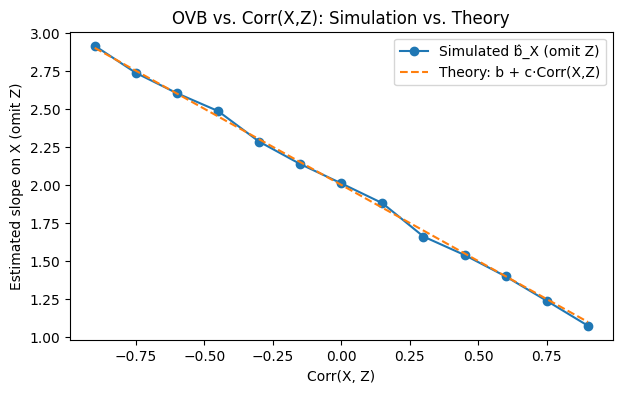

In [4]:
def simulate_with_corr(rho, n=2000, reps=3, a=1.0, b=2.0, c=-1.0, sigma=1.0):
    # average across a few reps to reduce simulation noise
    ests = []
    for _ in range(reps):
        X = np.random.normal(size=n)
        # Construct Z with target correlation rho to X, keeping Var(Z) ≈ 1
        Z = rho*X + np.random.normal(scale=np.sqrt(1 - rho**2), size=n)
        e = np.random.normal(scale=sigma, size=n)
        Y = a + b*X + c*Z + e
        est = sm.OLS(Y, sm.add_constant(pd.DataFrame({"X": X}))).fit().params["X"]
        ests.append(est)
    return np.mean(ests)

rhos = np.linspace(-0.9, 0.9, 13)  # try a range of correlations
ests = [simulate_with_corr(rho) for rho in rhos]
theory = [b_true + c_true * rho for rho in rhos]  # since Var(X)=1, Cov= rho

plt.figure(figsize=(7,4))
plt.plot(rhos, ests, marker="o", label="Simulated b̂_X (omit Z)")
plt.plot(rhos, theory, linestyle="--", label="Theory: b + c·Corr(X,Z)")
plt.xlabel("Corr(X, Z)")
plt.ylabel("Estimated slope on X (omit Z)")
plt.title("OVB vs. Corr(X,Z): Simulation vs. Theory")
plt.legend()
plt.show()


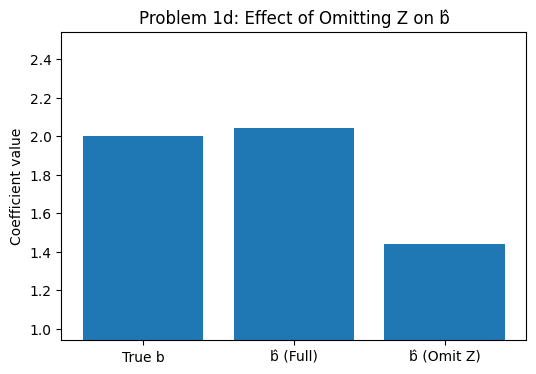

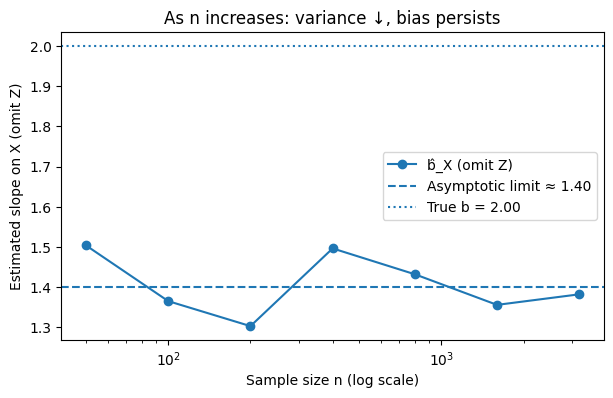

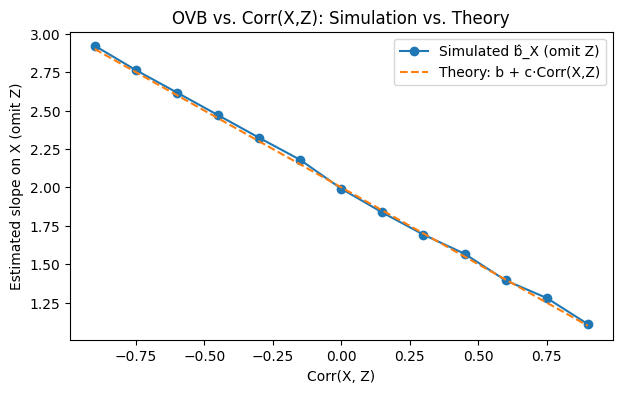

Saved: prob1d_bhat_comparison.png, prob1d_bias_vs_n.png, prob1d_bias_vs_corr.png


In [5]:



n = 400
X = np.random.normal(size=n)
Z = 0.6*X + np.random.normal(scale=0.8, size=n)
e = np.random.normal(scale=1.0, size=n)
Y = 1.0 + 2.0*X - 1.0*Z + e
m_full = sm.OLS(Y, sm.add_constant(pd.DataFrame({"X": X, "Z": Z}))).fit()
m_omit = sm.OLS(Y, sm.add_constant(pd.DataFrame({"X": X}))).fit()

plt.figure(figsize=(6,4))
labels = ["True b", "b̂ (Full)", "b̂ (Omit Z)"]
vals = [2.0, m_full.params["X"], m_omit.params["X"]]
plt.bar(labels, vals)
plt.ylabel("Coefficient value")
plt.title("Problem 1d: Effect of Omitting Z on b̂")
plt.ylim(min(vals+[2.0]) - 0.5, max(vals+[2.0]) + 0.5)
plt.savefig("prob1d_bhat_comparison.png", dpi=150, bbox_inches="tight")
plt.show()


ns = np.array([50, 100, 200, 400, 800, 1600, 3200])
beta_omits = [run_once(int(n), rho=0.6) for n in ns]
b_limit = 2.0 + (-1.0) * 0.6

plt.figure(figsize=(7,4))
plt.plot(ns, beta_omits, marker="o", label="b̂_X (omit Z)")
plt.axhline(b_limit, linestyle="--", label=f"Asymptotic limit ≈ {b_limit:.2f}")
plt.axhline(2.0, linestyle=":", label=f"True b = 2.00")
plt.xscale("log")
plt.xlabel("Sample size n (log scale)")
plt.ylabel("Estimated slope on X (omit Z)")
plt.title("As n increases: variance ↓, bias persists")
plt.legend()
plt.savefig("prob1d_bias_vs_n.png", dpi=150, bbox_inches="tight")
plt.show()


rhos = np.linspace(-0.9, 0.9, 13)
ests = [simulate_with_corr(rho) for rho in rhos]
theory = [2.0 + (-1.0) * rho for rho in rhos]

plt.figure(figsize=(7,4))
plt.plot(rhos, ests, marker="o", label="Simulated b̂_X (omit Z)")
plt.plot(rhos, theory, linestyle="--", label="Theory: b + c·Corr(X,Z)")
plt.xlabel("Corr(X, Z)")
plt.ylabel("Estimated slope on X (omit Z)")
plt.title("OVB vs. Corr(X,Z): Simulation vs. Theory")
plt.legend()
plt.savefig("prob1d_bias_vs_corr.png", dpi=150, bbox_inches="tight")
plt.show()

print("Saved: prob1d_bhat_comparison.png, prob1d_bias_vs_n.png, prob1d_bias_vs_corr.png")
